# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train.astype('float32') / 255
x_Test_normalize = x_Test.astype('float32') / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [19]:
#宣告採用序列模型
model = Sequential()
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=128, 
                kernel_initializer='normal', 
                activation='softmax'))
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


# 訓練模型

In [21]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [22]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 138us/step - loss: 1.4919 - acc: 0.6611 - val_loss: 0.9688 - val_acc: 0.6952
Epoch 2/10
48000/48000 [==============================] - 7s 149us/step - loss: 0.8181 - acc: 0.6881 - val_loss: 0.6637 - val_acc: 0.7055
Epoch 3/10
48000/48000 [==============================] - 8s 167us/step - loss: 0.6447 - acc: 0.7024 - val_loss: 0.5784 - val_acc: 0.7138
Epoch 4/10
48000/48000 [==============================] - 7s 142us/step - loss: 0.5859 - acc: 0.7210 - val_loss: 0.5385 - val_acc: 0.7387
Epoch 5/10
48000/48000 [==============================] - 8s 159us/step - loss: 0.5366 - acc: 0.7672 - val_loss: 0.4800 - val_acc: 0.7965
Epoch 6/10
48000/48000 [==============================] - 7s 156us/step - loss: 0.4654 - acc: 0.8394 - val_loss: 0.3728 - val_acc: 0.9429
Epoch 7/10
48000/48000 [==============================] - 7s 153us/step - loss: 0.3529 - acc: 0.9323 - val_loss: 0.2712 - 

# 以圖形顯示訓練過程

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

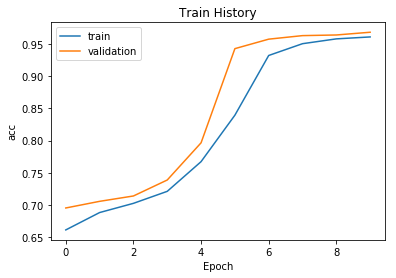

In [24]:
show_train_history(train_history,'acc','val_acc')

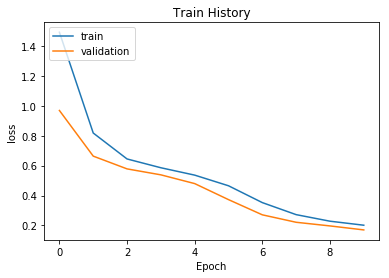

In [25]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [26]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 25us/step

accuracy= 0.968
